# Notes made while I was reading opencv tutorial about [Feature Detection and Description](http://docs.opencv.org/3.0-beta/doc/py_tutorials/py_feature2d/py_table_of_contents_feature2d/py_table_of_contents_feature2d.html)

In [1]:
%matplotlib inline
import cv2

from matplotlib import pyplot as plt
import numpy as np
import time as t

print(cv2.__version__)

3.2.0


In [4]:
img = cv2.imread('subway_2.png', 3)

def custom_convert(image):
    img = np.zeros_like(image)
    img[:,:,0] = image[:,:,2]
    img[:,:,1] = image[:,:,1]
    img[:,:,2] = image[:,:,0]
    return img

def show_image(cv_image):
    rows, cols, *channels = cv_image.shape
    channels = channels and channels[0]
    image = cv_image
    print(channels)

    if channels == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    #img2 = custom_convert(img)
        plt.imshow(image)
    else:
        plt.imshow(image, cmap='gray')
    plt.show()

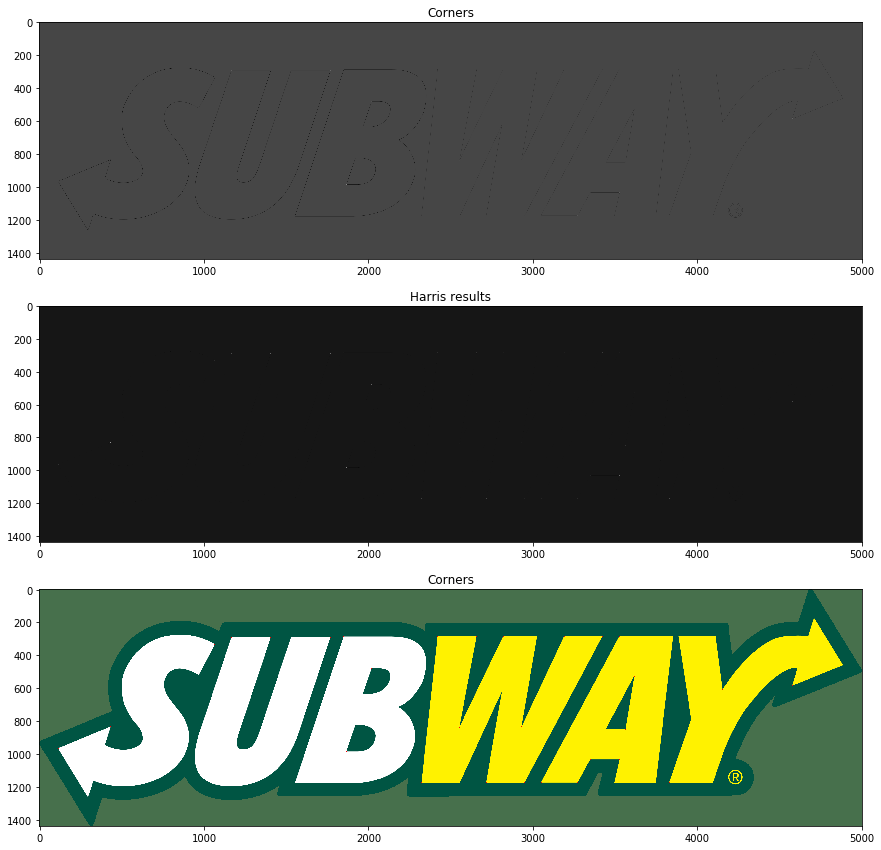

In [40]:
img = cv2.imread('subway_logo.png')

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

gray = np.float32(gray)
dst = cv2.cornerHarris(gray,2,3,0.04)

plt.figure(figsize=(40,20))
plt.subplot(411),plt.imshow(dst, cmap='gray'),plt.title('Corners')

#result is dilated for marking the corners, not important
dst = cv2.dilate(dst,None)

plt.subplot(412),plt.imshow(dst, cmap='gray'),plt.title('Harris results')

# Threshold for an optimal value, it may vary depending on the image.
img[dst > 0.01*dst.max()] = [0,0,255]
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

plt.subplot(413),plt.imshow(img),plt.title('Corners')

plt.show()

In [42]:
import cv2
import numpy as np

img = cv2.imread('subway_logo.png')
gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

sift = cv2.SIFT()
kp = sift.detect(gray,None)

img=cv2.drawKeypoints(gray,kp)
show_image(img)


AttributeError: module 'cv2' has no attribute 'SIFT'